In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("/Users/richardwestbrook/Library/Mobile Documents/com~apple~CloudDocs/Learning/Projects/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [21]:
df.iloc[:10,20:33]

,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,Y,Yes,11,3,1,80,0,8,0,1,6,4,0
1,Y,No,23,4,4,80,1,10,3,3,10,7,1
2,Y,Yes,15,3,2,80,0,7,3,3,0,0,0
3,Y,Yes,11,3,3,80,0,8,3,3,8,7,3
4,Y,No,12,3,4,80,1,6,3,3,2,2,2
5,Y,No,13,3,3,80,0,8,2,2,7,7,3
6,Y,Yes,20,4,1,80,3,12,3,2,1,0,0
7,Y,No,22,4,2,80,1,1,2,3,1,0,0
8,Y,No,21,4,2,80,0,10,2,3,9,7,1
9,Y,No,13,3,2,80,2,17,3,2,7,7,7


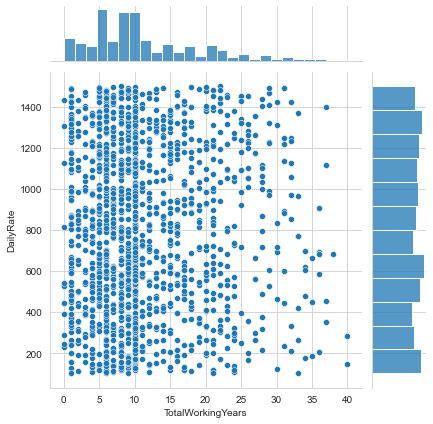

In [10]:
sns.jointplot(x='TotalWorkingYears',y='DailyRate',data=df)

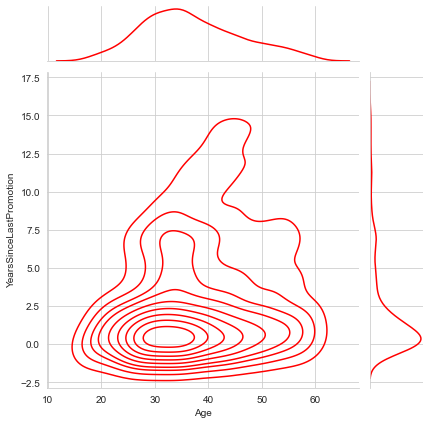

In [12]:
sns.jointplot(x='Age',y='YearsSinceLastPromotion',data=df,color='red',kind='kde');

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

In [24]:
cat_feats = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [25]:
from sklearn.model_selection import train_test_split

In [28]:
X = final_data.drop('Attrition', axis=1)
y = final_data['Attrition']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
cols = X_train.columns

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.816327,0.845464,-0.416667,0.0,0.0,0.0,0.085714,0.0,1.0,-1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.489796,-0.752241,-0.416667,0.0,0.0,0.5,-0.742857,0.0,0.5,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.326531,0.122625,-0.083333,-0.5,0.0,0.0,-0.800000,0.0,1.0,0.5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.387755,0.389387,0.500000,-0.5,0.0,0.5,-0.257143,1.0,0.0,-1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.653061,0.475439,0.250000,-1.0,0.0,0.5,0.228571,0.0,-0.5,-0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,0.244898,-0.441018,-0.416667,0.5,0.0,0.0,-0.057143,0.0,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
980,0.816327,-0.583005,-0.333333,-1.0,0.0,-1.0,-0.400000,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
981,-0.653061,0.494084,-0.416667,0.5,0.0,-1.0,0.514286,-2.0,-0.5,0.5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
982,0.571429,-0.911438,0.083333,0.0,0.0,-1.0,-0.314286,0.0,0.0,-0.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [43]:
predictions = logmodel.predict(X_test)

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.89      0.96      0.92       404
         Yes       0.66      0.43      0.52        82

    accuracy                           0.87       486
   macro avg       0.78      0.69      0.72       486
weighted avg       0.85      0.87      0.85       486

